In [1]:
import wobble
import matplotlib.pyplot as plt
import numpy as np

In [2]:
orders = np.arange(40,69)
data = wobble.Data('../data/video_e2ds.hdf5', orders=orders, min_snr=1, order=4)

In [9]:
# ls ../results/

In [10]:
results1 = wobble.Results(filename='../results/no_tellurics/results_video.hdf5')
results2 = wobble.Results(filename='../results/results_video.hdf5')

Results: reading from ../results/no_tellurics/results_video.hdf5


OSError: Unable to open file (unable to open file: name = '../results/no_tellurics/results_video.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

NameError: name 'results1' is not defined

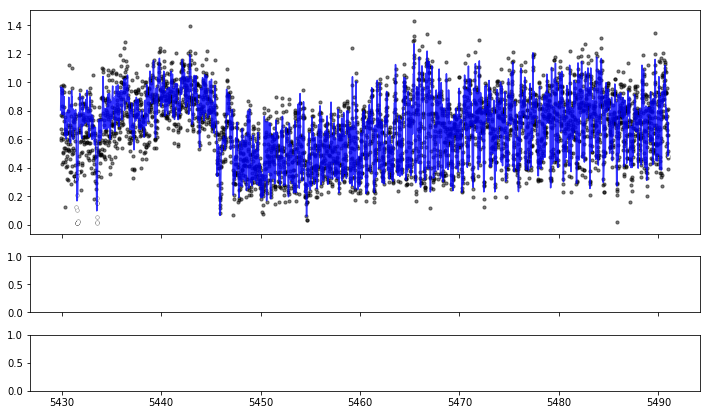

In [6]:
r = 5
e = 10
xs = np.exp(data.xs[r][e])
ys = np.exp(data.ys[r][e])
mask = data.ivars[r][e] <= 1.e-8

fig, (ax, ax2, ax3) = plt.subplots(3, 1, gridspec_kw = {'height_ratios':[4, 1, 1]}, figsize=(12,7), sharex=True)
ax.scatter(xs, ys, marker=".", alpha=0.5, c='k', label='data', s=40)
ax.scatter(xs[mask], ys[mask], marker=".", alpha=1., c='white', s=20)
ax.plot(xs, np.exp(results1.star_ys_predicted[r][e]), c='r', alpha=0.8, label='wobble best-fit')
ax.plot(xs, np.exp(results2.star_ys_predicted[r][e]), c='b', alpha=0.8, label='fit using pipeline RVs')
ax2.scatter(xs, np.exp(data.ys[r][e]) - np.exp(results1.star_ys_predicted[r][e]), 
                        marker=".", alpha=0.5, c='k', s=40)
ax2.scatter(xs[mask], np.exp(data.ys[r][e][mask]) - np.exp(results1.star_ys_predicted[r][e])[mask], 
                        marker=".", alpha=1., c='white', s=20)
ax3.scatter(xs, np.exp(data.ys[r][e]) - np.exp(results2.star_ys_predicted[r][e]), 
                        marker=".", alpha=0.5, c='k', s=40)
ax3.scatter(xs[mask], np.exp(data.ys[r][e][mask]) - np.exp(results2.star_ys_predicted[r][e])[mask], 
                        marker=".", alpha=1., c='white', s=20)
ax.set_ylim([0.0,1.4])
ax2.set_ylim([-0.3,0.3])
ax2.set_ylabel('wobble fit \nresids', fontsize=12)
ax3.set_ylim([-0.3,0.3])
ax3.set_ylabel('pipeline RV fit \nresids', fontsize=12)


ax.set_xlim([5470,5480])
ax.legend()
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

In [21]:
results1.star_rvs[r][e] - np.median(results1.star_rvs)

-2435.5118044211367

In [23]:
results2.star_rvs[r][e] - np.median(results2.star_rvs)

486.20915118168637